# Star Wars Survey


Many people like Star Wars, but what is Americans' fan-favorite movie of the series? To answer this question, survey data from [FiveThirtyEight](https://fivethirtyeight.com/) was acquired. FiveThirtyEight is a poll aggregation website, and they collected total of 835 responses for this survey, which can be seen from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).


Some of the important Columns in the dataset are:

- **RespondentID** - An anonymized ID for the respondent (person taking the survey)
- **Gender** - The respondent's gender
- **Age** - The respondent's age
- **Household Income** - The respondent's income
- **Education** - The respondent's education level
- **Location** (Census Region) - The respondent's location
- **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
- **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response





# Cleaning Data

In [2]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding = 'ISO-8859-1')

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

The dataset seems a little confusing at first glance. There are numerous unnamed columns, which are probably continued responses from the previous column. For example, the survey asks the respondents to rank Star Wars films in order of preference. The unnamed columns 4 to 8 are part of this preference rankings. 

We might also want to shorten the title of columns for readability and remove the NaN values. Some of the rows lack the respondentID or even lack most of the answers to the response. 


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next, we will take a look at the following columns:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?



In [6]:
Question = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
    ]

for col in Question:
    print(star_wars[col].value_counts())
    print(star_wars[col].dtype)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
object
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
object


The questions can be answered either 'yes' or 'no', and 'Nan' if the respondent chooses not to answer. These values are currently in string types, but we can convert them to Boolean values for analysis. 

In [7]:
yes_no = {'Yes': True, 'No': False}


for col in Question:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

Next, we will clean the following columns:
    
- **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.


For each of these columns, respondents left the name of the movie to confirm that they have watched it (probably by clicking a check box next to the movie name). If the value is NaN, the respondent either didn't answer or didn't see the movie. 

Let's convert each of these columns to a Boolean and rename them to something more intuitive. 


In [8]:
answer = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
     np.NaN: False
        }

seen = [
    'Which of the following Star Wars films have you seen? Please select all that apply.',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8'
        ]


for col in seen: 
    star_wars[col] = star_wars[col].map(answer)


In [9]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'})


star_wars.head()                     
                             

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask respondents to rank the Star Wars movies in 1 to 6.

- **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace
- **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
- **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
- **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We will convert each column into numeric type and rename the columns so they represent the data more easily. 



In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
star_wars = star_wars.rename(columns ={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
    })

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Finding the Best Ranked Movie

In [12]:
mean_ranking = star_wars[star_wars.columns[9:15]].mean()
print(mean_ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


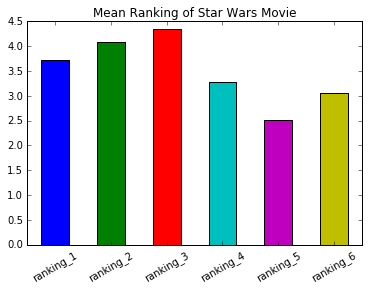

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

mean_ranking.plot.bar(x= 'movie', y ='mean rating', rot = 30, title = 'Mean Ranking of Star Wars Movie')

**Note: Lower Mean Ranking is better**

As expected, more people preferred the series 4-6 than 1-3. These were the original trilogy that made Star Wars popular. Among them, *Star Wars: Episode V The Empire Strikes Back* (ranking_5) had the best mean ranking. This is probably because many people remember the famous scene from the movie, 'I'm Your Father'.

# Finding The Most Viewed Movie

In [14]:
seen = star_wars[star_wars.columns[3:9]].sum()
print(seen)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


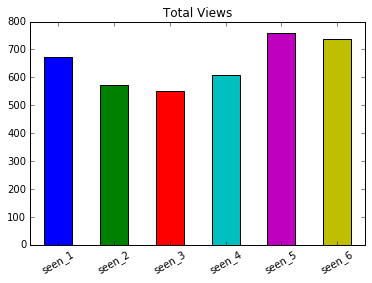

In [15]:
seen.plot.bar(rot = 30, title = 'Total Views')

Observations:
- Movies 5, 6, and 1 have the most views in that order

Movies with better ranking tends to have more views (fifth and sixth of the series). There is an exception however. *Episode 1: The Phantom Menace* has more views than *Episode 4: A New Hope* despite its lower mean ranking.

This can be explained by the order of how the two movies came out. *Episode 4: A New Hope* came out first when the reputation of Star Wars was not too high. On the contrary, *Episode 1: The Phantom Menacehave* came out after the fifth and sixth of the series, which gave the entire series high expectations. Thus, people generally liked *Episode 4: A New Hope* more because it was a better movie, but watched *Episode 1: The Phantom Menacehave* more.



# Observations by Segments

In this section, we want to examine how certain segments of survey population responded. 
We will split the dataframe into two groups based on a binary column by creating two subsets of the gender column. 


In [16]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

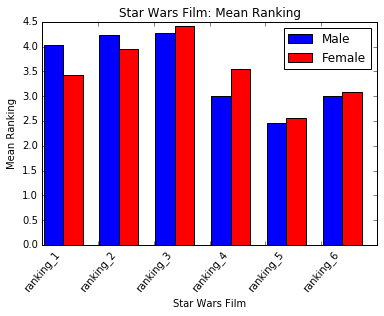

In [61]:
males_mean_ranking = males[males.columns[9:15]].mean()
females_mean_ranking = females[females.columns[9:15]].mean()

fig, ax = plt.subplots()
labels = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
x = np.arange(6) + 0.2
width = 0.35

rects1 = plt.bar(x - width/2, males_mean_ranking, width,
color='b',
label='Male')

rects2 = plt.bar(x + width/2, females_mean_ranking, width,
color='r',
label='Female')

plt.xlabel('Star Wars Film')
plt.ylabel('Mean Ranking')
plt.title('Star Wars Film: Mean Ranking')
ax.set_xticklabels(labels, rotation = 50)
plt.legend()

plt.show()

Observations: 
- Both genders preferred the original triloigy (Episode 4,5,6) than the prequels.
- Male audience tended to give better rankings for the original trilogy than the female audience
- Female audience gave better rankings for the first two prequels (Episode 1,2)
- *Episode 5: The Empire Strikes Back* was both genders' favorite and *Episode 3: Revenge of the Sith* was the least favorite. 



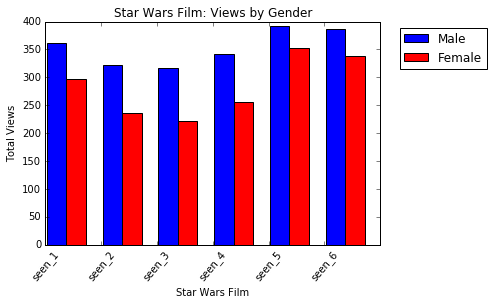

In [63]:
males_view = males[males.columns[3:9]].sum()
females_view = females[females.columns[3:9]].sum()



fig, ax = plt.subplots()
labels = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
x = np.arange(6) + 0.2
width = 0.35

rects1 = plt.bar(x - width/2, males_view, width,
color='b',
label='Male')

rects2 = plt.bar(x + width/2, females_view, width,
color='r',
label='Female')

plt.xlabel('Star Wars Film')
plt.ylabel('Total Views')
plt.title('Star Wars Film: Views by Gender')
ax.set_xticklabels(labels, rotation = 50)
plt.legend(bbox_to_anchor=(1.04,1), loc = 'upper left')

plt.show()

Observations:
- For all episodes, there were more male audience than female audience
- Both genders tend to follow the trend in total views 
- Episode 5,6, and 1 were viewed the most 
